In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from api_key import gkey
from scipy.stats import linregress


In [2]:
crime = "Resources/UCR_Part_1_Crime_for_Multiple_St._Louis_County_Police_Departments%2C_2019_Year_to_Date.csv"
crime_df = pd.read_csv(crime)
#crime_df

In [3]:
crime_df.columns


Index(['X', 'Y', 'UCRCOUNT', 'COMPLAINTYEAR', 'COMPLAINTNUM', 'UCR_OFFENSE',
       'UCR_CRIME_CODE', 'TYPE', 'MONTH', 'YEAR', 'DT_CALLREC', 'D_OCCURRED',
       'DOW_OCCURRED', 'ZONE', 'ADDRESS', 'PRECINCT', 'PREMISE',
       'REPORTING_JURIS', 'FOR_JURIS', 'X.1', 'Y.1', 'OBJECTID'],
      dtype='object')

In [4]:
reduced_crime_df = crime_df.loc[:, ['X', 'Y', 'COMPLAINTYEAR', 'UCR_OFFENSE', 'TYPE', 'YEAR',
                                    'ADDRESS']]
reduced_crime_df

,X,Y,COMPLAINTYEAR,UCR_OFFENSE,TYPE,YEAR,ADDRESS
0,-90.303477,38.680753,18,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,1439 KINGSLAND AVE
1,-90.271928,38.720354,18,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,7357 JENWOOD AVE
2,-90.268498,38.703995,19,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE
3,-90.256474,38.725830,18,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,8815 CLIFTON AVE
4,-90.215647,38.773309,18,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,11137 RIAZA SQ
...,...,...,...,...,...,...,...
17594,NaN,NaN,15,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,577 GODDARD AVE
17595,-90.546271,38.606776,19,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,328 NORWICH CT
17596,-90.295168,38.543718,19,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,4190 HOFFMEISTER AVE
17597,-90.448450,38.539104,19,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,1710 FENPARK DR


In [5]:
year_df = reduced_crime_df.loc[reduced_crime_df['COMPLAINTYEAR'] >= 19]
year_df

,X,Y,COMPLAINTYEAR,UCR_OFFENSE,TYPE,YEAR,ADDRESS
2,-90.268498,38.703995,19,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE
5,-90.197312,38.753107,19,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,CAMERON RD & ROSS CIR
6,-90.182395,38.777746,19,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,610 PRIGGE RD
7,NaN,NaN,19,"RAPE, BY FORCE (AFTER 12-31-2012)",PERSON,2019,NaN
8,NaN,NaN,19,"RAPE, BY FORCE (AFTER 12-31-2012)",PERSON,2019,NaN
...,...,...,...,...,...,...,...
17593,-90.245846,38.745910,19,"MOTOR VEHICLE THEFT, TRUCK/BUS",PROPERTY,2019,9810 DUKE DR
17595,-90.546271,38.606776,19,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,328 NORWICH CT
17596,-90.295168,38.543718,19,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,4190 HOFFMEISTER AVE
17597,-90.448450,38.539104,19,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,1710 FENPARK DR


In [6]:
ryear_df = year_df.loc[:, ['X', 'Y', 'UCR_OFFENSE', 'TYPE', 'YEAR',
                                    'ADDRESS']]
ryear_df.dropna(inplace = True) 

ryear_df = ryear_df.reset_index(drop=True)
ryear_df

,X,Y,UCR_OFFENSE,TYPE,YEAR,ADDRESS
0,-90.268498,38.703995,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE
1,-90.197312,38.753107,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,CAMERON RD & ROSS CIR
2,-90.182395,38.777746,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,610 PRIGGE RD
3,-90.470593,38.540136,"ROBBERY, FIREARM",PERSON,2019,1860 BOWLES AVE
4,-90.449337,38.614038,"ROBBERY, FIREARM",PERSON,2019,1909 WINDMOOR PL
...,...,...,...,...,...,...
16453,-90.245846,38.745910,"MOTOR VEHICLE THEFT, TRUCK/BUS",PROPERTY,2019,9810 DUKE DR
16454,-90.546271,38.606776,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,328 NORWICH CT
16455,-90.295168,38.543718,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,4190 HOFFMEISTER AVE
16456,-90.448450,38.539104,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,1710 FENPARK DR


In [7]:
ryear_df['Zipcode'] = ""
ryear_df.head()

,X,Y,UCR_OFFENSE,TYPE,YEAR,ADDRESS,Zipcode
0,-90.268498,38.703995,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE,
1,-90.197312,38.753107,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,CAMERON RD & ROSS CIR,
2,-90.182395,38.777746,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,610 PRIGGE RD,
3,-90.470593,38.540136,"ROBBERY, FIREARM",PERSON,2019,1860 BOWLES AVE,
4,-90.449337,38.614038,"ROBBERY, FIREARM",PERSON,2019,1909 WINDMOOR PL,


In [8]:
# # TEST DATA
# ryear_df_test = ryear_df.head()
# locations = ryear_df_test[["X", "Y"]]

# #locations = ryear_df[["X", "Y"]]

# #geo_data = requests.get(target_url).json()
# type(locations)
# params = {"key": gkey}
# #for i in locations:
#    # print(i)
# master_zips= []

In [9]:
# # TEST DATA
# #ryear_df_test = ryear_df.head(5).copy()
# #locations = ryear_df_test[["X", "Y", 'Zipcode']]

# locations = ryear_df[["X", "Y", 'Zipcode']]

# #geo_data = requests.get(target_url).json()
# type(locations)
# params = {"key": gkey}
# #for i in locations:
#    # print(i)
# master_zips= []
# try:
#     for index, data in locations.iterrows():
#         if  data['Zipcode'] == '':

#             url = f'https://maps.googleapis.com/maps/api/geocode/json?latlng={data["Y"]},{data["X"]}&key={params["key"]}'
#             #print(url)
#             response = requests.get(url).json()
#             zip_list = []
#             results = response['results']


#             for result in results:
#             #print(result)
#                 if result.get('address_components'):
#                     for component in result.get('address_components'):
#                         #print(component)
#                         ctype = (component.get("types"))[0]
#                         if ctype == 'postal_code':
#                             current_zip = component.get('short_name')
#                             zip_list.append(current_zip)

#                 zip_list = list(set(zip_list))

#           #  master_zips.append(zip_list)
#             ryear_df.loc[index, 'Zipcode'] = zip_list[0]
# except ValueError:
#     print('There is something wrong with this zipcode!')

In [10]:
ryear_df.head(17000)


,X,Y,UCR_OFFENSE,TYPE,YEAR,ADDRESS,Zipcode
0,-90.268498,38.703995,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE,
1,-90.197312,38.753107,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,CAMERON RD & ROSS CIR,
2,-90.182395,38.777746,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,610 PRIGGE RD,
3,-90.470593,38.540136,"ROBBERY, FIREARM",PERSON,2019,1860 BOWLES AVE,
4,-90.449337,38.614038,"ROBBERY, FIREARM",PERSON,2019,1909 WINDMOOR PL,
...,...,...,...,...,...,...,...
16453,-90.245846,38.745910,"MOTOR VEHICLE THEFT, TRUCK/BUS",PROPERTY,2019,9810 DUKE DR,
16454,-90.546271,38.606776,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,328 NORWICH CT,
16455,-90.295168,38.543718,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,4190 HOFFMEISTER AVE,
16456,-90.448450,38.539104,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,1710 FENPARK DR,


In [11]:
#cryear_df = ryear_df.copy()
ryear_df.to_csv('Zip.csv')

In [12]:
csv_path = "Resources/Zip.csv"
zip_df = pd.read_csv(csv_path)
zip_df.head()

,Unnamed: 0,X,Y,UCR_OFFENSE,TYPE,YEAR,ADDRESS,Zipcode
0,0,-90.268498,38.703995,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE,63136
1,1,-90.197312,38.753107,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,CAMERON RD & ROSS CIR,63137
2,2,-90.182395,38.777746,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,610 PRIGGE RD,63138
3,3,-90.470593,38.540136,"ROBBERY, FIREARM",PERSON,2019,1860 BOWLES AVE,63026
4,4,-90.449337,38.614038,"ROBBERY, FIREARM",PERSON,2019,1909 WINDMOOR PL,63131


In [13]:
zip_df = zip_df.loc[:, ['UCR_OFFENSE', 'TYPE', 'YEAR',
                                    'ADDRESS', 'Zipcode']]
zip_df

,UCR_OFFENSE,TYPE,YEAR,ADDRESS,Zipcode
0,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,5200 HELEN AVE,63136
1,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,CAMERON RD & ROSS CIR,63137
2,"HOMICIDE, MURDER AND NONNEGLIGENT MANSLAUGHTER",PERSON,2019,610 PRIGGE RD,63138
3,"ROBBERY, FIREARM",PERSON,2019,1860 BOWLES AVE,63026
4,"ROBBERY, FIREARM",PERSON,2019,1909 WINDMOOR PL,63131
...,...,...,...,...,...
16453,"MOTOR VEHICLE THEFT, TRUCK/BUS",PROPERTY,2019,9810 DUKE DR,63136
16454,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,328 NORWICH CT,63011
16455,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,4190 HOFFMEISTER AVE,63125
16456,"MOTOR VEHICLE THEFT, OTHER VEHICLE",PROPERTY,2019,1710 FENPARK DR,63026


In [24]:
zip_df.dtypes

UCR_OFFENSE    object
TYPE           object
YEAR            int64
ADDRESS        object
Zipcode         int64
dtype: object

In [88]:
jennings_df = zip_df[zip_df.Zipcode == 63136]
jnn_df = jennings_df['Zipcode'].value_counts()
jg_df = (jnn_df * 1000) / 48560
jg_df

63136    44.0486
Name: Zipcode, dtype: float64

In [50]:
north_df = zip_df[zip_df.Zipcode == 63137]
spanish_lake_df = zip_df[zip_df.Zipcode == 63138]
fenton_df = zip_df[zip_df.Zipcode == 63026]
town_country_df = zip_df[zip_df.Zipcode == 63131]
webster_df = zip_df[zip_df.Zipcode == 63119]
kirkwood_df = zip_df[zip_df.Zipcode == 63122]
manchester_df = zip_df[zip_df.Zipcode == 63011]
mehlville_df = zip_df[zip_df.Zipcode == 63125]
wildwood_df = zip_df[zip_df.Zipcode == 63040]
ucity_df = zip_df[zip_df.Zipcode == 63130]
sunhills_df = zip_df[zip_df.Zipcode == 63127]
stann_df = zip_df[zip_df.Zipcode == 63074]

In [51]:
rheights_df = zip_df[zip_df.Zipcode == 63117]
ballwin_df = zip_df[zip_df.Zipcode == 63021]
berkeley_df = zip_df[zip_df.Zipcode == 63134]
brentwood_df = zip_df[zip_df.Zipcode == 63144]
bridgeton_df = zip_df[zip_df.Zipcode == 63044]
chesterfield_df = zip_df[zip_df.Zipcode == 63017]
clayton_df = zip_df[zip_df.Zipcode == 63105]
chesterfields_df = zip_df[zip_df.Zipcode == 63005] 
concord_df = zip_df[zip_df.Zipcode == 63128]
eureka_df = zip_df[zip_df.Zipcode == 63025]
mheights_df = zip_df[zip_df.Zipcode == 63043] 
ccoeur_df = zip_df[zip_df.Zipcode == 63141]
jamestown_df = zip_df[zip_df.Zipcode == 63034]
stl_df = zip_df[zip_df.Zipcode == 63146]
vpark_df = zip_df[zip_df.Zipcode == 63088] 

In [52]:
pagedale_df = zip_df[zip_df.Zipcode == 63133]
overland_df = zip_df[zip_df.Zipcode == 63114]
olivette_df = zip_df[zip_df.Zipcode == 63132]
oakville_df = zip_df[zip_df.Zipcode == 63129]
maplewood_df = zip_df[zip_df.Zipcode == 63143]
ladue_df = zip_df[zip_df.Zipcode == 63124]
kinloch_df = zip_df[zip_df.Zipcode == 63140]
hazelwood_df = zip_df[zip_df.Zipcode == 63042]
florissant_df = zip_df[zip_df.Zipcode == 63033]
newflorissant_df = zip_df[zip_df.Zipcode == 63031]
ferguson_df = zip_df[zip_df.Zipcode == 63135]
#crestwood_df == zip_df[zip_df.Zipcode == 63126]
affton_df = zip_df[zip_df.Zipcode == 63123]

In [91]:
crime_df = zip_df['Zipcode'].value_counts()
crime_df

63136    2139
63125    1147
63138     925
63129     901
63137     871
63117     782
63123     716
63121     685
63033     670
63119     627
63144     608
63114     580
63026     549
63128     490
63017     478
63005     393
63011     390
63141     319
63143     304
63146     241
63132     240
63133     214
63034     202
63105     186
63021     185
63031     181
63131     181
63134     176
63122     156
63025     148
63127     143
63124     138
63088     114
63126      84
63069      57
63074      47
63044      34
63038      31
63040      31
63140      21
63045      20
63135      16
63049      14
63130       7
63043       4
63145       2
63042       2
63167       2
63108       1
63115       1
63110       1
63147       1
63106       1
63112       1
63120       1
Name: Zipcode, dtype: int64

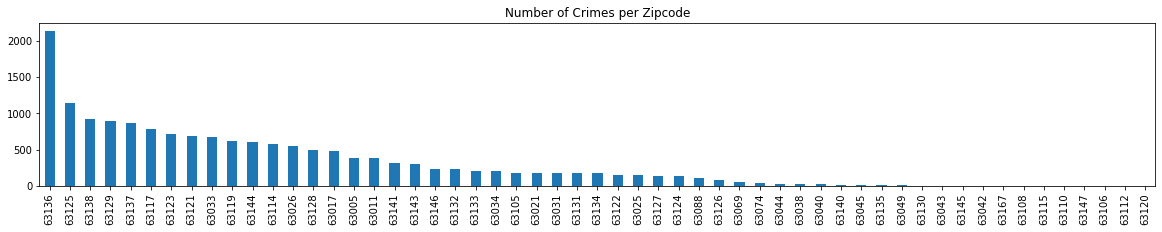

In [92]:

crime_df.plot(kind='bar', figsize = (20,3))
#state_and_inches.plot(kind="bar", figsize=(20,3))
plt.title('Number of Crimes per Zipcode')

plt.show()
#plt.tight_layout()

([<matplotlib.patches.Wedge at 0x1307378c160>,
 [Text(0.07614110761792825, -1.0973616230444343, 'Person'),
  Text(-0.07614100487551775, 1.0973616301732745, 'Property')],
 [Text(0.04153151324614268, -0.5985608852969642, '74.4%'),
  Text(-0.04153145720482786, 0.5985608891854224, '25.6%')])

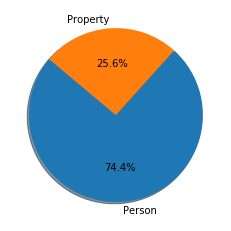

In [90]:
jenn_df = jennings_df['TYPE'].value_counts()
jenn_df
types = ['Person', 'Property']
#types = jennings_df['Type']
plt.pie(jenn_df, labels=types, autopct="%1.1f%%", shadow=True, startangle=140)

#plt.pie(sex_pd, labels=gender, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x13075025240>,
 [Text(0.6782301156235466, -0.8660276613718935, 'Person'),
  Text(-0.6782300548110235, 0.8660277089972561, 'Property')],
 [Text(0.3699436994310254, -0.4723787243846691, '93.4%'),
  Text(-0.36994366626055825, 0.47237875036213967, '6.6%')])

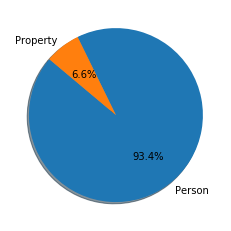

In [80]:
tc_df = town_country_df['TYPE'].value_counts()
tc_df
types = ['Person', 'Property']
#types = jennings_df['Type']
plt.pie(tc_df, labels=types, autopct="%1.1f%%", shadow=True, startangle=140)


([<matplotlib.patches.Wedge at 0x1307506a3c8>,
 [Text(0.46122960533358115, -0.9986326908147105, 'Person'),
  Text(-0.46122965208295025, 0.9986326692229935, 'Property')],
 [Text(0.2515797847274079, -0.5447087404443874, '86.0%'),
  Text(-0.2515798102270637, 0.5447087286670873, '14.0%')])

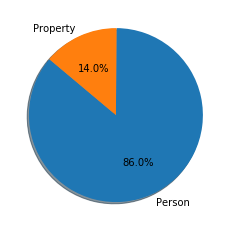

In [81]:
stl_df = zip_df['TYPE'].value_counts()
stl_df
types = ['Person', 'Property']
plt.pie(stl_df, labels=types, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x13074f891d0>,
 [Text(0.5537645801299849, -0.950444522207089, 'Person'),
  Text(-0.5537646023767449, 0.950444509245293, 'Property')],
 [Text(0.30205340734362807, -0.5184242848402303, '89.0%'),
  Text(-0.3020534194782244, 0.5184242777701598, '11.0%')])

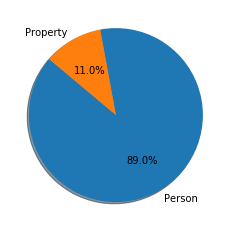

In [82]:
mehl_df = mehlville_df['TYPE'].value_counts()
mehl_df
types = ['Person', 'Property']
plt.pie(mehl_df, labels=types, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x13073b07cc0>,
 [Text(0.7258622097517025, -0.8265131895223304, 'Person'),
  Text(-0.7258621710598271, 0.8265132235023916, 'Property')],
 [Text(0.3959248416827467, -0.45082537610308926, '95.2%'),
  Text(-0.3959248205780875, 0.45082539463766813, '4.8%')])

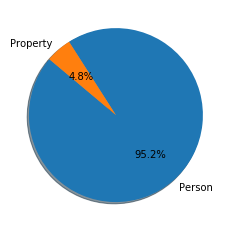

In [84]:
clay_df = clayton_df['TYPE'].value_counts()
clay_df
types = ['Person', 'Property']
plt.pie(clay_df, labels=types, autopct="%1.1f%%", shadow=True, startangle=140)